In [ ]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'MARUTI.NS.csv'
Maruti=pd.read_csv(FileName)

In [ ]:
Maruti.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,09/07/2003,164.899994,170.399994,155.00,164.300003,144.897522,35164284
1,10/07/2003,167.000000,168.699997,164.50,167.000000,147.278656,10464179
2,11/07/2003,167.750000,174.850006,166.25,173.350006,152.878784,11740117
3,14/07/2003,174.250000,179.250000,174.25,177.949997,156.935547,5982324
4,15/07/2003,200.000000,200.000000,173.00,176.199997,155.392227,6173689


In [ ]:
Maruti.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4485,23/08/2021,6905.00,6918.000000,6801.000000,6825.899902,6825.899902,537302
4486,24/08/2021,6789.50,6852.000000,6740.600098,6803.200195,6803.200195,646993
4487,25/08/2021,6838.00,6838.000000,6700.000000,6711.450195,6711.450195,722194
4488,26/08/2021,6700.00,6701.350098,6591.000000,6608.600098,6608.600098,1199429
4489,27/08/2021,6629.75,6694.600098,6600.000000,6624.850098,6624.850098,1428388


In [ ]:
df1=Maruti.reset_index()['Close']

In [ ]:
df1.shape

(4490,)

In [ ]:
df1

0        164.300003
1        167.000000
2        173.350006
3        177.949997
4        176.199997
           ...     
4485    6825.899902
4486    6803.200195
4487    6711.450195
4488    6608.600098
4489    6624.850098
Name: Close, Length: 4490, dtype: float64

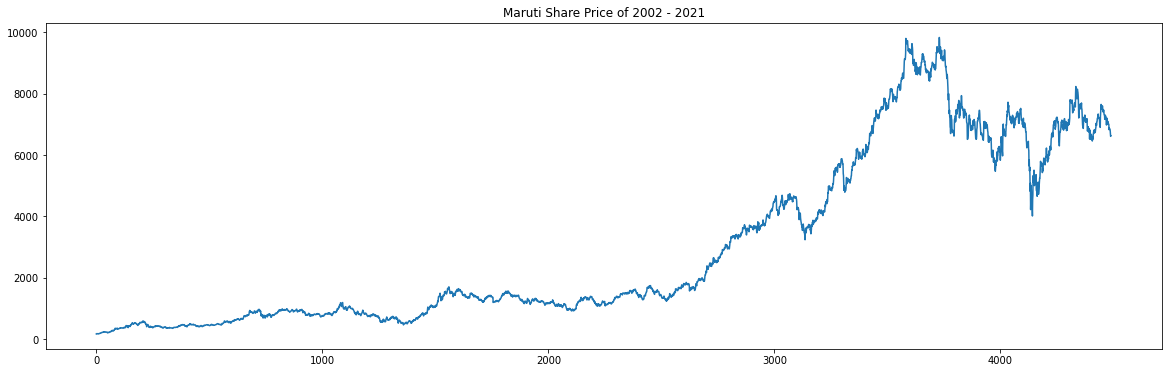

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.title('Maruti Share Price of 2002 - 2021')
plt.plot(df1)

In [ ]:
Maruti.Date = pd.to_datetime(Maruti.Date)
Maruti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4490 non-null   datetime64[ns]
 1   Open       4490 non-null   float64       
 2   High       4490 non-null   float64       
 3   Low        4490 non-null   float64       
 4   Close      4490 non-null   float64       
 5   Adj Close  4490 non-null   float64       
 6   Volume     4490 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 245.7 KB


In [ ]:
Maruti = Maruti.set_index('Date')

In [ ]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     |████████████████████████████████| 306 kB 5.8 MB/s 
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=3b10a9f4f8bfaf126b94255a0b98a6eca935a9f2527817da11ae9ae0299a8b8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-yfoml4cx/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [ ]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 846 kB/s 


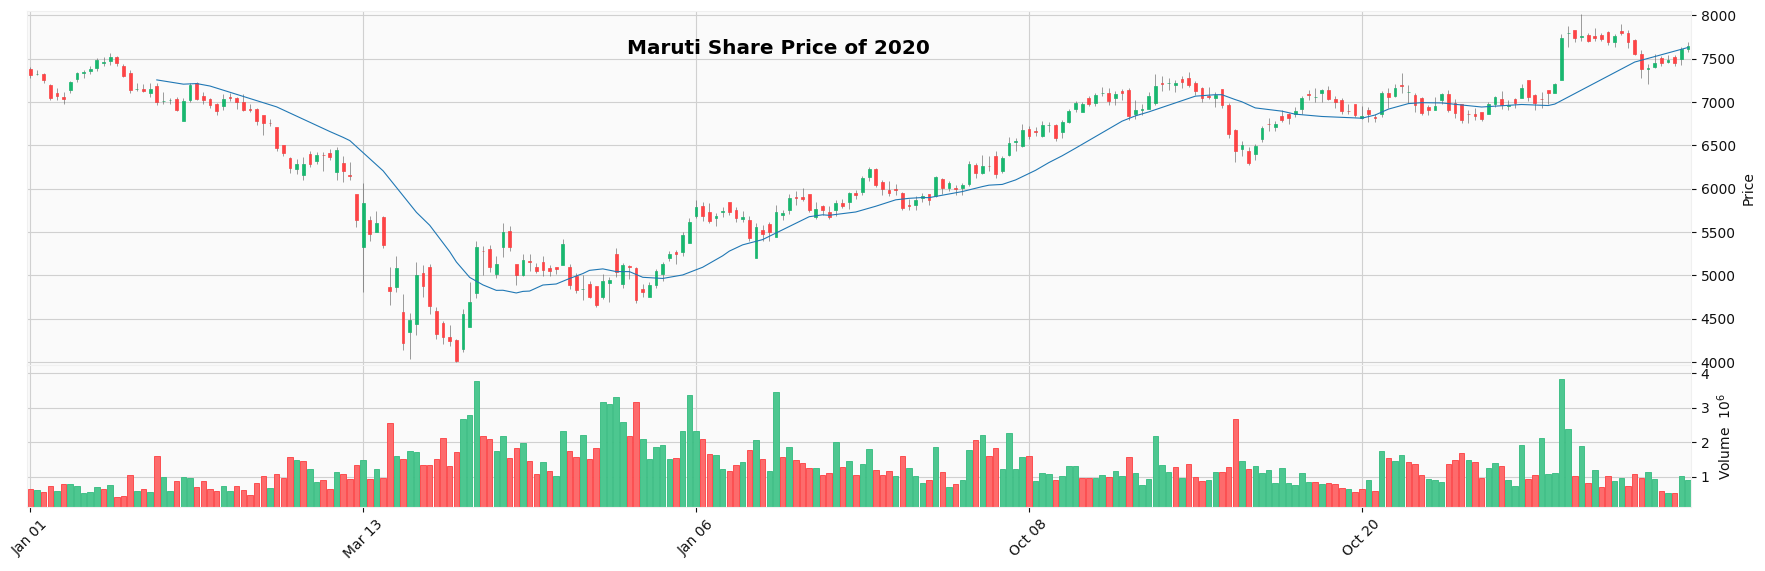

In [ ]:
import mplfinance as mpf
mpf.plot(Maruti['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'Maruti Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.00000000e+00],
       [2.79267176e-04],
       [9.36063551e-04],
       ...,
       [6.77187472e-01],
       [6.66549440e-01],
       [6.68230216e-01]])

In [ ]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(3367, 1123)

In [ ]:
len(train_data), len(test_data)

(3367, 1123)

In [ ]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.00000000e+00 2.79267176e-04 9.36063551e-04 ... 1.65233247e-02
  1.68543096e-02 1.78938040e-02]
 [2.79267176e-04 9.36063551e-04 1.41185167e-03 ... 1.68543096e-02
  1.78938040e-02 1.78938040e-02]
 [9.36063551e-04 1.41185167e-03 1.23084497e-03 ... 1.78938040e-02
  1.78938040e-02 1.82454767e-02]
 ...
 [5.33235427e-01 5.34926506e-01 5.50787875e-01 ... 5.94901795e-01
  5.92734916e-01 5.92662493e-01]
 [5.34926506e-01 5.50787875e-01 5.41851326e-01 ... 5.92734916e-01
  5.92662493e-01 6.22135576e-01]
 [5.50787875e-01 5.41851326e-01 5.34197328e-01 ... 5.92662493e-01
  6.22135576e-01 6.18530947e-01]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(3266, 100)
(3266,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(1022, 100)
(1022,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
52/52 [==============================] - 16s 215ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 2/100
52/52 [==============================] - 10s 196ms/step - loss: 1.4084e-04 - val_loss: 0.0016
Epoch 3/100
52/52 [==============================] - 10s 195ms/step - loss: 1.2800e-04 - val_loss: 0.0016
Epoch 4/100
52/52 [==============================] - 10s 196ms/step - loss: 1.2505e-04 - val_loss: 0.0019
Epoch 5/100
52/52 [==============================] - 10s 193ms/step - loss: 1.2179e-04 - val_loss: 0.0017
Epoch 6/100
52/52 [==============================] - 10s 195ms/step - loss: 1.3518e-04 - val_loss: 0.0015
Epoch 7/100
52/52 [==============================] - 10s 194ms/step - loss: 1.4620e-04 - val_loss: 0.0030
Epoch 8/100
52/52 [==============================] - 10s 193ms/step - loss: 1.2179e-04 - val_loss: 0.0013
Epoch 9/100
52/52 [==============================] - 10s 190ms/step - loss: 1.3448e-04 - val_loss: 0.0014
Epoch 10/100
52/52 [==============================

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2060.8445827725723

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

7273.012716156233

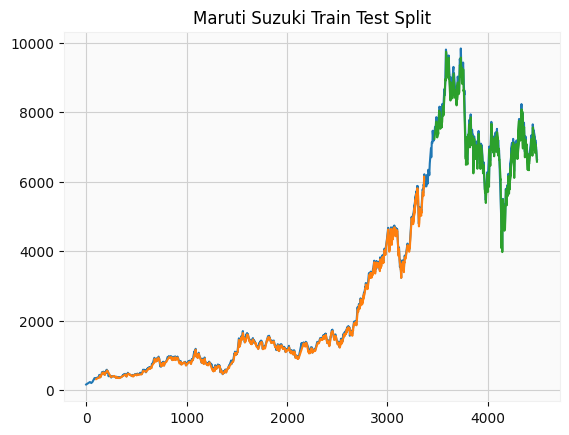

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Maruti Suzuki Train Test Split')
plt.show()

In [ ]:
len(test_data)

1123

In [ ]:
x_input=test_data[1023:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6573263]
101
1 day input [0.68130921 0.6930695  0.68912356 0.68914942 0.65744739 0.6879806
 0.67023679 0.67063502 0.656532   0.67048502 0.67084188 0.67353113
 0.66968342 0.66242765 0.66294996 0.662107   0.65072943 0.66543754
 0.65616999 0.66463594 0.67255367 0.6763186  0.68262283 0.67979394
 0.68816161 0.67976808 0.67784943 0.6874945  0.68385366 0.67991808
 0.68786167 0.69375216 0.69791011 0.71058058 0.70381611 0.7039299
 0.71595907 0.71646073 0.72613686 0.72870196 0.72923983 0.735544
 0.74186373 0.73175322 0.727709   0.73018102 0.72542833 0.72422851
 0.71885002 0.70386268 0.70282835 0.69667928 0.73448382 0.75178809
 0.76158831 0.7741605  0.76870444 0.75745617 0.76039364 0.76747876
 0.76638757 0.76903545 0.76029541 0.75351538 0.74852997 0.75106407
 0.75565645 0.75154502 0.74082941 0.73878662 0.73842976 0.72415609
 0.73110161 0.73801603 0.73742649 0.73142221 0.73188251 0.72410437
 0.70636056 0.70472635 0.71499202 0.72765728 0.71767606 0.70988241
 0.71745884 0.71548847 0.70723459 0.70

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

4490

Text(0.5, 1.0, 'Maruti Prediction of Next 30 Days')

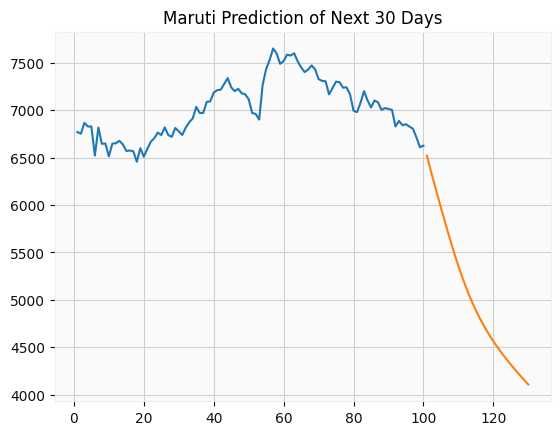

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[4390:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Maruti Prediction of Next 30 Days')

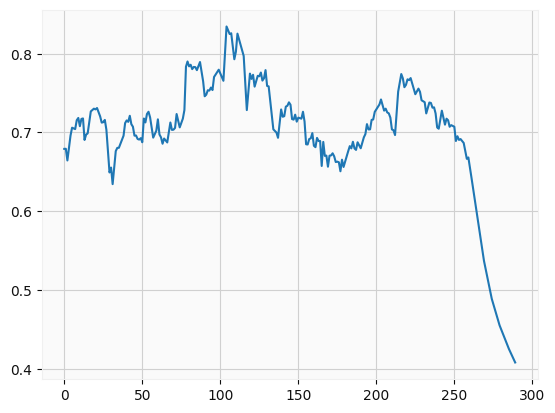

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4230:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

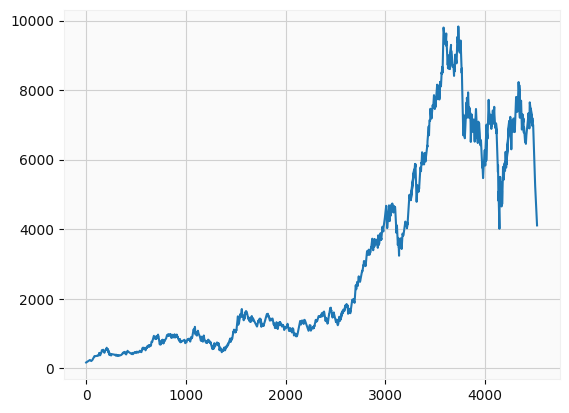

In [ ]:
plt.plot(df3)